In [1]:
import torch
from torch import nn
import torch.nn.functional as F

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                               ])

# Download and load MNIST data
trainset = datasets.MNIST("~/.pytorch/MNIST_data/", download=True, train=True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

100%|█████████▉| 9912320/9912422 [00:16<00:00, 443459.55it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]
  0%|          | 0/28881 [00:00<?, ?it/s]


32768it [00:00, 138878.29it/s]           
0it [00:00, ?it/s]
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz



 94%|█████████▍| 1548288/1648877 [00:02<00:00, 963075.51it/s]
1654784it [00:02, 658955.65it/s]                             
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz



  0%|          | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 53368.63it/s]            

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
# Sequential model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))


#loss
criterion = nn.CrossEntropyLoss()

In [3]:
# Get data
images, labels = next(iter(trainloader))
print(images.shape)
# Reshape
images = images.view(images.shape[0], -1)
print(images.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


In [0]:
# Forward-pass
logits = model(images)

# calculate loss
loss = criterion(logits, labels)

In [5]:
loss

tensor(2.3046, grad_fn=<NllLossBackward>)

# AutoGrad


In [6]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 1.9066,  0.0620],
        [ 1.2417, -0.6656]], requires_grad=True)


In [7]:
y = x**2
print(y)

tensor([[3.6351, 0.0038],
        [1.5418, 0.4431]], grad_fn=<PowBackward0>)


In [8]:
print(y.grad_fn)

In [9]:
z = y.mean()
print(z)

tensor(1.4060, grad_fn=<MeanBackward0>)


In [10]:
y

tensor([[3.6351, 0.0038],
        [1.5418, 0.4431]], grad_fn=<PowBackward0>)

In [11]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.9533,  0.0310],
        [ 0.6209, -0.3328]])
tensor([[ 0.9533,  0.0310],
        [ 0.6209, -0.3328]], grad_fn=<DivBackward0>)


# Loss and Autograd

In [12]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 6.0551e-04,  6.0551e-04,  6.0551e-04,  ...,  6.0551e-04,
          6.0551e-04,  6.0551e-04],
        [-1.8962e-03, -1.8962e-03, -1.8962e-03,  ..., -1.8962e-03,
         -1.8962e-03, -1.8962e-03],
        [-1.5076e-05, -1.5076e-05, -1.5076e-05,  ..., -1.5076e-05,
         -1.5076e-05, -1.5076e-05],
        ...,
        [-3.8099e-03, -3.8099e-03, -3.8099e-03,  ..., -3.8099e-03,
         -3.8099e-03, -3.8099e-03],
        [ 1.9478e-03,  1.9478e-03,  1.9478e-03,  ...,  1.9478e-03,
          1.9478e-03,  1.9478e-03],
        [-5.5266e-03, -5.5266e-03, -5.5266e-03,  ..., -5.5266e-03,
         -5.5266e-03, -5.5266e-03]])


# Training

In [0]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [15]:
print('Initial weights - ', model[0].weight)

Initial weights -  Parameter containing:
tensor([[ 0.0158,  0.0164,  0.0034,  ..., -0.0155, -0.0266,  0.0249],
        [-0.0058,  0.0239, -0.0005,  ...,  0.0326,  0.0268,  0.0156],
        [-0.0144,  0.0129, -0.0172,  ...,  0.0342, -0.0073,  0.0120],
        ...,
        [ 0.0141,  0.0034, -0.0087,  ..., -0.0221, -0.0050, -0.0018],
        [-0.0019,  0.0245, -0.0173,  ..., -0.0091, -0.0276,  0.0129],
        [-0.0303,  0.0063,  0.0245,  ...,  0.0280, -0.0231,  0.0272]],
       requires_grad=True)


In [16]:
images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Gradient - tensor([[ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0041, -0.0041, -0.0041,  ..., -0.0041, -0.0041, -0.0041],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        ...,
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0029, -0.0029, -0.0029,  ..., -0.0029, -0.0029, -0.0029]])


In [17]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0158,  0.0163,  0.0034,  ..., -0.0156, -0.0266,  0.0249],
        [-0.0057,  0.0240, -0.0005,  ...,  0.0326,  0.0268,  0.0156],
        [-0.0144,  0.0129, -0.0172,  ...,  0.0342, -0.0073,  0.0120],
        ...,
        [ 0.0141,  0.0034, -0.0087,  ..., -0.0221, -0.0050, -0.0018],
        [-0.0019,  0.0245, -0.0173,  ..., -0.0091, -0.0276,  0.0129],
        [-0.0303,  0.0063,  0.0245,  ...,  0.0281, -0.0231,  0.0272]],
       requires_grad=True)


In [18]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() 
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.86727640217047
Training loss: 0.8189677430241347
Training loss: 0.520464127156526
Training loss: 0.43017591804520156
Training loss: 0.38599084322450006


In [0]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

tensor([[3.9958e-04, 1.1549e-04, 2.3699e-03, 1.0326e-03, 1.8480e-04, 1.5745e-02,
         1.8688e-04, 9.2420e-05, 9.6789e-01, 1.1988e-02]])


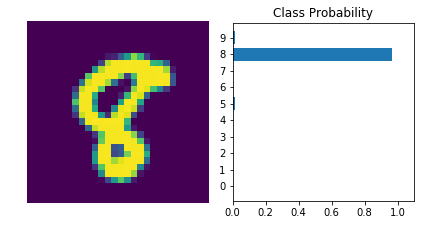

In [28]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)
print(ps)